#Trabajo Final
Coderhouse - Curso Data Science III
Mariano Giongrande
Comisión 61640

## Trabajo NLP

https://github.com/mgiongrande/DataScience3/blob/0a68281ddd6c16158f605b6cb71264963acfe9b6/NLP%20Giongrande.ipynb

## Consignas

 Consignas para los alumnos:
 1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
 2. Reordena las capas del modelo para que coincidan con el modelo correcto.
 3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
 4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
 5. Calcula el accuracy del modelo corregido.

 PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 PS2: para el entrenamiento no màs de 5 e`pocas y validarlo.

Capas a usar.

In [1]:
#Dense(10, activation='softmax')
#Dense(256, activation='relu'),
#Dropout(0.2),
#Dropout(0.2),
#Dense(128, activation='relu'),
#Flatten(input_shape=(28, 28)),
#Dense(512, activation='relu'),


In [2]:
# Explicación para los alumnos:
# Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
# Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
# Además, emplea Dropout para reducir el sobreajuste.


## Importación de librerías

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np


## Carga del dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


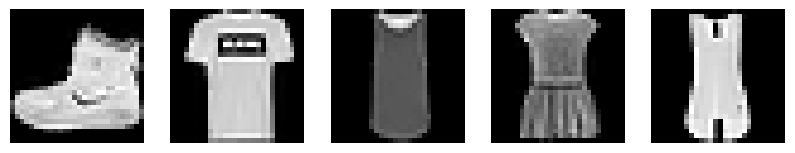

In [4]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [5]:
# Muestro el shape de los datos
x_train.shape

(60000, 28, 28)

## Modelador

Creé una clase para instanciar modelos con la misma estructura, pero recibiendo un diccionario de parámetros con los datos para entrenar y validar, y las unidades para las capas Dense y el porcentaje de unidades a apagar para la capa Dropout.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score
import tensorflow as tf
import random
import os

In [7]:
class Modelador:
  def __init__(self, params):

    required_keys = ['x_train', 'y_train', 'x_test', 'y_test', 'units1', 'rate1', 'units2', 'rate2']
    for key in required_keys:
        if key not in params:
            raise ValueError(f"El parámetro '{key}' es obligatorio y falta en 'params'.")

    self.__sedSeed()
    self.__x_train = params['x_train']
    self.__y_train = params['y_train']
    self.__x_test = params['x_test']
    self.__y_test = params['y_test']
    self.__resultado = None

    self.__modelo = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(params['units1'], activation='relu'),
        Dropout(params['rate1']),
        Dense(params['units2'], activation='relu'),
        Dropout(params['rate2']),
        Dense(10, activation='softmax')
    ])

    self.__modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  def __sedSeed(self,seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

  def nombreModelo(self):
    return self.__modelo.name

  def summary(self):
    self.__modelo.summary()

  def entrenar(self,batchSize=32):
    self.__resultado = self.__modelo.fit(self.__x_train, self.__y_train,epochs=5,batch_size=batchSize, shuffle=True, validation_data=(self.__x_test, self.__y_test))

  def accuracy(self):
    y_pred = np.argmax(self.__modelo.predict(self.__x_test), axis=1)
    return accuracy_score(self.__y_test, y_pred)

  def graficar(self):
    if self.__resultado is None:
      print("ERROR: El modelo no fue entrenado.")
      return

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(self.__resultado.history['accuracy'], label='Entrenamiento')
    axs[0].plot(self.__resultado.history['val_accuracy'], label='Validación')
    axs[0].set_title('Precisión (Accuracy) durante el entrenamiento')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    axs[1].plot(self.__resultado.history['loss'], label='Entrenamiento')
    axs[1].plot(self.__resultado.history['val_loss'], label='Validación')
    axs[1].set_title('Pérdida (Loss) durante el entrenamiento')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

## Validador

También creé una clase para entrenar y validar el modelo, recibieno un diccionario que tiene como parámetros un array para el batch size, y otro array para los modelos a validar.

In [8]:
class Validador:
  def __init__(self, params):
    required_keys = ['batchSize', 'modelos']
    for key in required_keys:
        if key not in params:
            raise ValueError(f"El parámetro '{key}' es obligatorio y falta en 'params'.")

    self.__batchSize = params['batchSize']
    self.__modelos = params['modelos']

  def validar(self):
    for modelo in self.__modelos:
      for size in self.__batchSize:
        print(f'Modelo: {modelo.nombreModelo()}')
        print(f'Batch Size: {size}')
        modelo.entrenar(size)
        print(f'Accuracy del modelo {modelo.nombreModelo()}: {modelo.accuracy()}. Batch Size: {size}')

## Parámetros para los modelos

### Modelo I

In [9]:
parametros1 = {
    "units1": 256,
    "rate1": 0.2,
    "units2": 128,
    "rate2": 0.2,
    "x_train": x_train,
    "y_train": y_train,
    "x_test": x_test,
    "y_test": y_test
}

In [10]:
model1 = Modelador(parametros1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Modelo II

In [11]:
parametros2 = {
    "units1": 512,
    "rate1": 0.4,
    "units2": 256,
    "rate2": 0.3,
    "x_train": x_train,
    "y_train": y_train,
    "x_test": x_test,
    "y_test": y_test
}

In [12]:
model2 = Modelador(parametros2)

## Parámetros para entrenamiento y validación

In [13]:
parametros_validacion = {
    "batchSize": [256,512,1024],
    "modelos": [model1,model2]
}

validador = Validador(parametros_validacion)

## Entrenamiento y validación

In [14]:
validador.validar()

Modelo: sequential
Batch Size: 256
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6895 - loss: 0.8846 - val_accuracy: 0.8428 - val_loss: 0.4462
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8458 - loss: 0.4376 - val_accuracy: 0.8574 - val_loss: 0.3986
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8598 - loss: 0.3902 - val_accuracy: 0.8641 - val_loss: 0.3791
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8688 - loss: 0.3569 - val_accuracy: 0.8643 - val_loss: 0.3747
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8783 - loss: 0.3386 - val_accuracy: 0.8655 - val_loss: 0.3612
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy del modelo sequential: 0.8655. Batch Size: 256
Modelo: sequential
Batch Size: 512
Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8861 - loss: 0.3159 - val_accuracy: 0.8785 - val_loss: 0.3382
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8888

## Gráficos comparativos

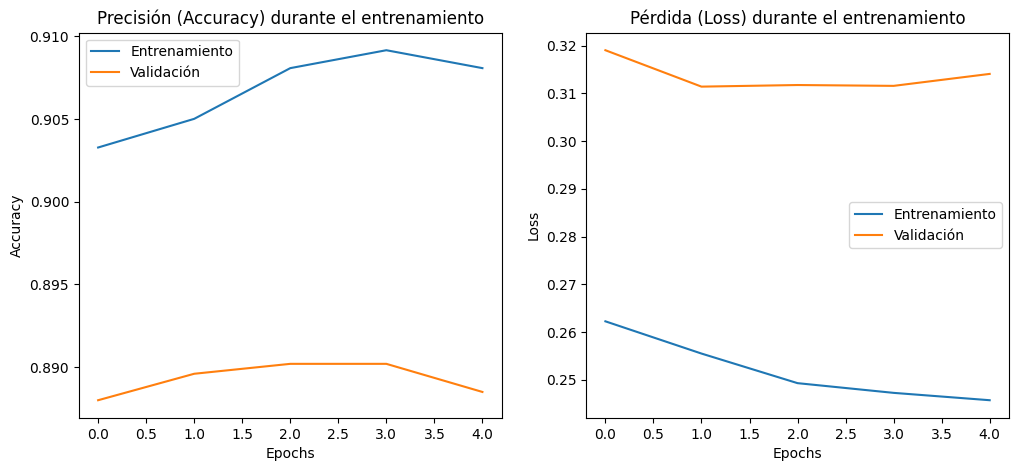

In [15]:
model1.graficar()

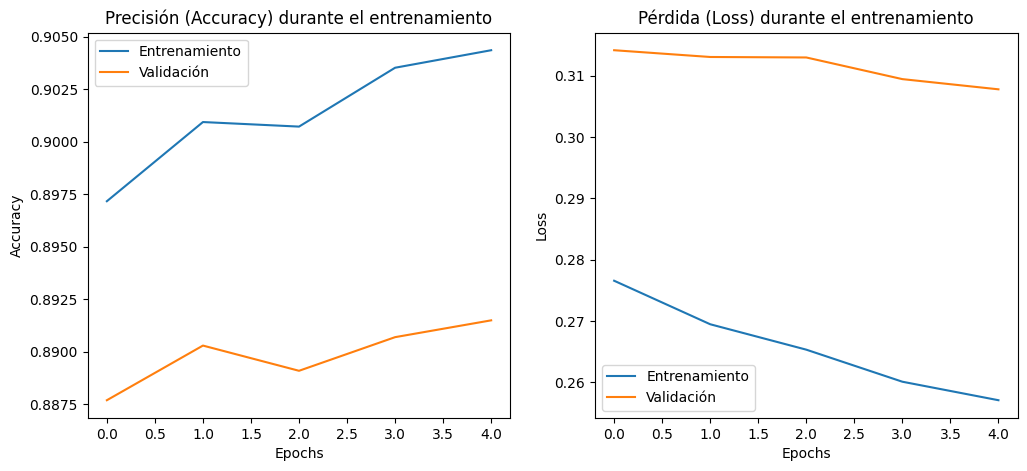

In [16]:
model2.graficar()

## Conclusiones

Los resultados obtenidos permiten elegir al **model2** como el de mejor performance, con un **batch size de 1024**.
Los gráficos muestran para el **model1** que existe probabilidad de **overfitting** ya que el accuracy, tanto para entrenamiento y validación se estanca para luego disminuir. El gráfico correspondiente a la pérdida (loss, que mide el error en la predicción del modelo, ya sea para el entrenamiento o la validación), muestra una disminución constante para el entrenamiento, pero estancamiento y luego aumento para la validación, lo que refuerza la posibilidad de **overfitting**.